In [2]:
import spacy
nlp = spacy.blank('id')
import gensim
import pandas as pd
import nltk
import numpy as np
from sklearn import preprocessing

In [3]:
df = pd.read_excel("pemilu.xlsx")
df.head()

,id_pembuat,id_status,nama_pembuat,teks_status,gambar_status,url_komentar,waktu_status,id_komentar,id_user_komen,komentar,waktu_komen,label
0,23383061178,23383061178_10152076252911179,Bang Nafie,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076253441179,794948677210695,Oke pak boss!!,2014-06-05 03:55:15,positif
1,23383061178,23383061178_10152076252911179,Sumy Kakasyi Suhaimy,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076253906179,355122887988412,Jangan dusta,2014-06-05 03:55:29,negatif
2,23383061178,23383061178_10152076252911179,Roberto Red,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076253996179,297825977080553,PROBOWO is the WINNER of PEMILU 2014,2014-06-05 03:55:32,positif
3,23383061178,23383061178_10152076252911179,Sugiarman Arman,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076254066179,298708870333739,ilmu padi,2014-06-05 03:55:35,netral
4,23383061178,23383061178_10152076252911179,Rio Corps Taruna,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076254216179,1523715244533780,Hidup Pak Prabowo ..,2014-06-05 03:55:42,positif


In [4]:
df['label'].value_counts()

positif    2912
negatif     332
netral      120
Name: label, dtype: int64

positif    0.865636
negatif    0.098692
netral     0.035672
Name: label, dtype: float64

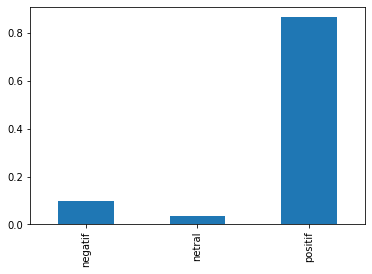

In [5]:
diagram_coba = df.label.value_counts(normalize=True)
diagram_coba[["negatif", "netral", "positif"]].plot(kind="bar")
diagram_coba

In [4]:
import re
import string
nltk.download('punkt')

komentar = df['komentar'].astype(str)

#Mengecilkan huruf
komentar = komentar.apply(lambda x: x.lower())

#Hapus URL
komentar = komentar.apply(lambda x: re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE))

#Hapus Angka
komentar = komentar.apply(lambda x: re.sub(r"\d", "", x))

#Pisahin tanda baca sebelum dihapus
komentar = komentar.apply(lambda x: re.sub(r'(?<=[,.])(?=[^\s])', r' ', x))

#Hilangin tanda baca
komentar = komentar.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

#Hapus Non-Alphanumeric
komentar = komentar.apply(lambda x: re.sub(r'([^\s\w]|_)+', '', x))

#Tokenizing
komentar = komentar.apply(lambda x: nltk.tokenize.word_tokenize(x))

df['komentar'] = komentar
df

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\egapa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,id_pembuat,id_status,nama_pembuat,teks_status,gambar_status,url_komentar,waktu_status,id_komentar,id_user_komen,komentar,waktu_komen,label
0,23383061178,23383061178_10152076252911179,Bang Nafie,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076253441179,794948677210695,"[oke, pak, boss]",2014-06-05 03:55:15,positif
1,23383061178,23383061178_10152076252911179,Sumy Kakasyi Suhaimy,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076253906179,355122887988412,"[jangan, dusta]",2014-06-05 03:55:29,negatif
2,23383061178,23383061178_10152076252911179,Roberto Red,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076253996179,297825977080553,"[probowo, is, the, winner, of, pemilu]",2014-06-05 03:55:32,positif
3,23383061178,23383061178_10152076252911179,Sugiarman Arman,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076254066179,298708870333739,"[ilmu, padi]",2014-06-05 03:55:35,netral
4,23383061178,23383061178_10152076252911179,Rio Corps Taruna,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076254216179,1523715244533780,"[hidup, pak, prabowo]",2014-06-05 03:55:42,positif
...,...,...,...,...,...,...,...,...,...,...,...,...
3359,249750628565406,249750628565406_276917339182068,Anita Rizkia,"Dukungan anda semua adalah amanah, dan apapun ...",https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/249750628565406/posts...,2014-07-09 03:19:51,276891429184659_276927652514370,967613349931842,"[salam, jari]",2014-07-09 03:25:45,positif
3360,249750628565406,249750628565406_276917339182068,Ari Bin Abu Bakar,"Dukungan anda semua adalah amanah, dan apapun ...",https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/249750628565406/posts...,2014-07-09 03:19:51,276891429184659_276918865848582,773356856051191,"[jujur, ketika, ane, membuka, surat, suara, ta...",2014-07-09 03:21:40,negatif
3361,249750628565406,249750628565406_276917339182068,Agek James,"Dukungan anda semua adalah amanah, dan apapun ...",https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/249750628565406/posts...,2014-07-09 03:19:51,276891429184659_276921042515031,710343512387954,"[bapak, jokowi, kami, semua, rakyat, ingin, ba...",2014-07-09 03:24:02,positif
3362,249750628565406,249750628565406_276917339182068,ChairudinDr Humaniora,"Dukungan anda semua adalah amanah, dan apapun ...",https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/249750628565406/posts...,2014-07-09 03:19:51,276891429184659_276931322514003,10152763210314600,"[tanda, alam, pemilu, day, on, juli, hasil, je...",2014-07-09 03:26:36,positif


In [5]:
df = df[df.komentar.astype(bool)]

X_temp = df['komentar']
y = df['label']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_temp, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
from gensim.models.fasttext import FastText
model = FastText.load_fasttext_format('../../../cc.id.300.bin')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `load_fasttext_format` (use load_facebook_vectors (to use pretrained embeddings) or load_facebook_model (to continue training with the loaded full model, more RAM) instead).
  


In [9]:
from MeanVectorizer import MeanEmbeddingVectorizer
mean_vec_tr = MeanEmbeddingVectorizer(model)

In [10]:
X_train_vector = mean_vec_tr.transform(X_train)
X_test_vector = mean_vec_tr.transform(X_test)

In [11]:
import xgboost as xgb
from xgboost import XGBClassifier

In [12]:
lc=preprocessing.LabelEncoder()
lc.fit(y)

LabelEncoder()

In [13]:
y_train_enc=lc.transform(y_train)
y_test_enc=lc.transform(y_test)

In [14]:
train=xgb.DMatrix(X_train_vector,label=y_train_enc)
test=xgb.DMatrix(X_test_vector,label=y_test_enc)

In [15]:
param = {}

# Learning Rate:  0.01
# Gamma:  2
# Max Depth:  2
# Subsample:  0.4
# Colsample Bytree:  0.8
# Alpha:  1
# Lamda:  4.5
# Min Child Weight:  1
# Number of Trees:  100

# Learning Rate:  0.01
# Gamma:  0.3
# Max Depth:  7
# Subsample:  0.4
# Colsample Bytree:  0.6
# Alpha:  0
# Lamda:  1.5
# Min Child Weight:  1
# Number of Trees:  1000

param['num_class']=len(set(y))
param['objective'] = 'multi:softmax'
param['learning_rate'] = 0.01
param['gamma'] = 0.3
param['max_depth'] = 7
param['subsample'] = 0.4
param['colsample_bytree'] = 0.6
param['reg_alpha'] = 0
param['reg_lambda'] = 1.5
param['min_child_weight'] = 1
num_round = 1000

watchlist = [(train, 'train'), (test, 'test')]
bst = xgb.train(param, train, num_round, watchlist)

[0]	train-merror:0.12467	test-merror:0.15719
[1]	train-merror:0.11344	test-merror:0.14371
[2]	train-merror:0.11494	test-merror:0.13772
[3]	train-merror:0.11793	test-merror:0.13922
[4]	train-merror:0.11531	test-merror:0.13623
[5]	train-merror:0.11644	test-merror:0.13323
[6]	train-merror:0.11606	test-merror:0.13323
[7]	train-merror:0.11793	test-merror:0.13323
[8]	train-merror:0.11793	test-merror:0.13174
[9]	train-merror:0.11681	test-merror:0.13174
[10]	train-merror:0.11756	test-merror:0.13174
[11]	train-merror:0.11831	test-merror:0.13174
[12]	train-merror:0.11793	test-merror:0.13174
[13]	train-merror:0.11906	test-merror:0.13323
[14]	train-merror:0.11943	test-merror:0.13323
[15]	train-merror:0.12130	test-merror:0.13323
[16]	train-merror:0.12093	test-merror:0.13323
[17]	train-merror:0.12055	test-merror:0.13174
[18]	train-merror:0.12018	test-merror:0.13174
[19]	train-merror:0.12018	test-merror:0.13174
[20]	train-merror:0.12055	test-merror:0.13174
[21]	train-merror:0.12243	test-merror:0.1317

[177]	train-merror:0.10034	test-merror:0.13174
[178]	train-merror:0.10034	test-merror:0.13174
[179]	train-merror:0.10034	test-merror:0.13174
[180]	train-merror:0.10034	test-merror:0.13174
[181]	train-merror:0.09996	test-merror:0.13174
[182]	train-merror:0.09996	test-merror:0.13174
[183]	train-merror:0.09959	test-merror:0.13174
[184]	train-merror:0.09959	test-merror:0.13174
[185]	train-merror:0.09996	test-merror:0.13174
[186]	train-merror:0.09996	test-merror:0.13174
[187]	train-merror:0.09996	test-merror:0.13174
[188]	train-merror:0.09959	test-merror:0.13174
[189]	train-merror:0.09921	test-merror:0.13174
[190]	train-merror:0.09921	test-merror:0.13174
[191]	train-merror:0.09921	test-merror:0.13174
[192]	train-merror:0.09884	test-merror:0.13174
[193]	train-merror:0.09884	test-merror:0.13174
[194]	train-merror:0.09884	test-merror:0.13174
[195]	train-merror:0.09884	test-merror:0.13174
[196]	train-merror:0.09846	test-merror:0.13174
[197]	train-merror:0.09846	test-merror:0.13174
[198]	train-m

[352]	train-merror:0.07301	test-merror:0.13174
[353]	train-merror:0.07263	test-merror:0.13174
[354]	train-merror:0.07226	test-merror:0.13174
[355]	train-merror:0.07188	test-merror:0.13174
[356]	train-merror:0.07113	test-merror:0.13174
[357]	train-merror:0.07151	test-merror:0.13174
[358]	train-merror:0.07113	test-merror:0.13174
[359]	train-merror:0.07113	test-merror:0.13174
[360]	train-merror:0.07151	test-merror:0.13174
[361]	train-merror:0.07076	test-merror:0.13174
[362]	train-merror:0.07039	test-merror:0.13174
[363]	train-merror:0.07001	test-merror:0.13174
[364]	train-merror:0.07001	test-merror:0.13174
[365]	train-merror:0.06964	test-merror:0.13174
[366]	train-merror:0.07001	test-merror:0.13174
[367]	train-merror:0.07001	test-merror:0.13174
[368]	train-merror:0.07001	test-merror:0.13174
[369]	train-merror:0.06926	test-merror:0.13174
[370]	train-merror:0.06926	test-merror:0.13174
[371]	train-merror:0.06926	test-merror:0.13174
[372]	train-merror:0.06926	test-merror:0.13174
[373]	train-m

[527]	train-merror:0.03669	test-merror:0.13024
[528]	train-merror:0.03669	test-merror:0.13024
[529]	train-merror:0.03557	test-merror:0.13024
[530]	train-merror:0.03482	test-merror:0.13024
[531]	train-merror:0.03482	test-merror:0.13024
[532]	train-merror:0.03482	test-merror:0.13024
[533]	train-merror:0.03519	test-merror:0.13024
[534]	train-merror:0.03482	test-merror:0.13024
[535]	train-merror:0.03444	test-merror:0.13024
[536]	train-merror:0.03407	test-merror:0.13024
[537]	train-merror:0.03407	test-merror:0.13024
[538]	train-merror:0.03444	test-merror:0.13024
[539]	train-merror:0.03407	test-merror:0.13024
[540]	train-merror:0.03444	test-merror:0.13024
[541]	train-merror:0.03407	test-merror:0.13024
[542]	train-merror:0.03407	test-merror:0.13174
[543]	train-merror:0.03407	test-merror:0.13024
[544]	train-merror:0.03407	test-merror:0.13174
[545]	train-merror:0.03332	test-merror:0.13174
[546]	train-merror:0.03295	test-merror:0.13174
[547]	train-merror:0.03295	test-merror:0.13024
[548]	train-m

[702]	train-merror:0.01647	test-merror:0.13174
[703]	train-merror:0.01647	test-merror:0.13174
[704]	train-merror:0.01647	test-merror:0.13174
[705]	train-merror:0.01610	test-merror:0.13174
[706]	train-merror:0.01610	test-merror:0.13174
[707]	train-merror:0.01610	test-merror:0.13174
[708]	train-merror:0.01610	test-merror:0.13174
[709]	train-merror:0.01610	test-merror:0.13174
[710]	train-merror:0.01572	test-merror:0.13174
[711]	train-merror:0.01610	test-merror:0.13174
[712]	train-merror:0.01572	test-merror:0.13174
[713]	train-merror:0.01572	test-merror:0.13174
[714]	train-merror:0.01535	test-merror:0.13174
[715]	train-merror:0.01572	test-merror:0.13174
[716]	train-merror:0.01610	test-merror:0.13174
[717]	train-merror:0.01572	test-merror:0.13174
[718]	train-merror:0.01610	test-merror:0.13174
[719]	train-merror:0.01610	test-merror:0.13174
[720]	train-merror:0.01610	test-merror:0.13174
[721]	train-merror:0.01610	test-merror:0.13174
[722]	train-merror:0.01610	test-merror:0.13174
[723]	train-m

[877]	train-merror:0.00973	test-merror:0.13174
[878]	train-merror:0.00973	test-merror:0.13174
[879]	train-merror:0.00936	test-merror:0.13174
[880]	train-merror:0.00936	test-merror:0.13174
[881]	train-merror:0.00936	test-merror:0.13174
[882]	train-merror:0.00936	test-merror:0.13174
[883]	train-merror:0.00936	test-merror:0.13174
[884]	train-merror:0.00936	test-merror:0.13174
[885]	train-merror:0.00936	test-merror:0.13174
[886]	train-merror:0.00936	test-merror:0.13174
[887]	train-merror:0.00936	test-merror:0.13174
[888]	train-merror:0.00936	test-merror:0.13174
[889]	train-merror:0.00936	test-merror:0.13174
[890]	train-merror:0.00936	test-merror:0.13174
[891]	train-merror:0.00936	test-merror:0.13174
[892]	train-merror:0.00936	test-merror:0.13174
[893]	train-merror:0.00936	test-merror:0.13174
[894]	train-merror:0.00936	test-merror:0.13174
[895]	train-merror:0.00936	test-merror:0.13174
[896]	train-merror:0.00936	test-merror:0.13174
[897]	train-merror:0.00936	test-merror:0.13174
[898]	train-m

In [16]:
pred = bst.predict(test)
pred2 = bst.predict(train)

In [17]:
predictions = lc.inverse_transform(list(map(int,pred)))
predictions2 = lc.inverse_transform(list(map(int,pred2)))

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

test_score = accuracy_score(predictions,y_test)
train_score = accuracy_score(predictions2, y_train)

print("\nTest Score\n", test_score, "\n")
print("Train Score\n", train_score, "\n")
print("CONFUSSION MATRIX\n", confusion_matrix(y_test, predictions), "\n")
print("CLASSIFICATION REPORT\n", classification_report(y_test, predictions), "\n")


Test Score
 0.8682634730538922 

Train Score
 0.9913889928865594 

CONFUSSION MATRIX
 [[  1   0  65]
 [  0   0  22]
 [  1   0 579]] 

CLASSIFICATION REPORT
               precision    recall  f1-score   support

     negatif       0.50      0.02      0.03        66
      netral       0.00      0.00      0.00        22
     positif       0.87      1.00      0.93       580

    accuracy                           0.87       668
   macro avg       0.46      0.34      0.32       668
weighted avg       0.80      0.87      0.81       668
 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


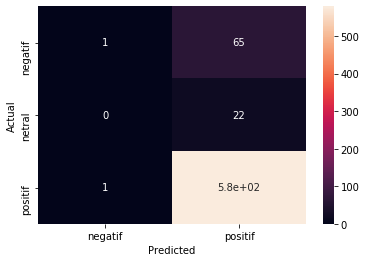

In [19]:
import seaborn as sn

confusion = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion, annot=True)

In [20]:
# # Create XGB Classifier object
# xgb_clf = xgb.XGBClassifier(tree_method = "exact", predictor = "gpu_predictor", verbosity = 1, objective = "multi:softmax")

# # Create parameter grid
# # parameters = {"learning_rate": [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.01, 0.001],
# #                "gamma" : [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1, 1.5, 2, 3, 4, 6],
# #                "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20],
# #                "colsample_bytree": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
# #                "subsample": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
# #                "reg_alpha": [0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
# #                "reg_lambda": [1, 1.5, 2, 3, 4.5, 4, 5],
# #                "min_child_weight": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
# #                "n_estimators": [100, 250, 500, 1000],
# #                "num_boost_round": [100, 250, 500, 750, 1000]}

# parameters = {"learning_rate": [0.1, 0.01, 0.001],
#                "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
#                "max_depth": [2, 4, 7, 10],
#                "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
#                "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
#                "reg_alpha": [0, 0.5, 1],
#                "reg_lambda": [1, 1.5, 2, 3, 4.5],
#                "min_child_weight": [1, 3, 5, 7],
#                "n_estimators": [100, 250, 500, 1000]}

# from sklearn.model_selection import RandomizedSearchCV
# # Create RandomizedSearchCV Object
# xgb_rscv = RandomizedSearchCV(xgb_clf, param_distributions = parameters, scoring = "f1_micro",
#                              cv = 10, verbose = 3, random_state = 40 )
           
# # Fit the model
# model_xgboost = xgb_rscv.fit(X_train_vector, y_train)

# # Model best estimators
# print("Learning Rate: ", model_xgboost.best_estimator_.get_params()["learning_rate"])
# print("Gamma: ", model_xgboost.best_estimator_.get_params()["gamma"])
# print("Max Depth: ", model_xgboost.best_estimator_.get_params()["max_depth"])
# print("Subsample: ", model_xgboost.best_estimator_.get_params()["subsample"])
# print("Colsample Bytree: ", model_xgboost.best_estimator_.get_params()["colsample_bytree"])
# print("Alpha: ", model_xgboost.best_estimator_.get_params()["reg_alpha"])
# print("Lamda: ", model_xgboost.best_estimator_.get_params()["reg_lambda"])
# print("Min Child Weight: ", model_xgboost.best_estimator_.get_params()["min_child_weight"])
# print("Number of Trees: ", model_xgboost.best_estimator_.get_params()["n_estimators"])